In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Moving Average

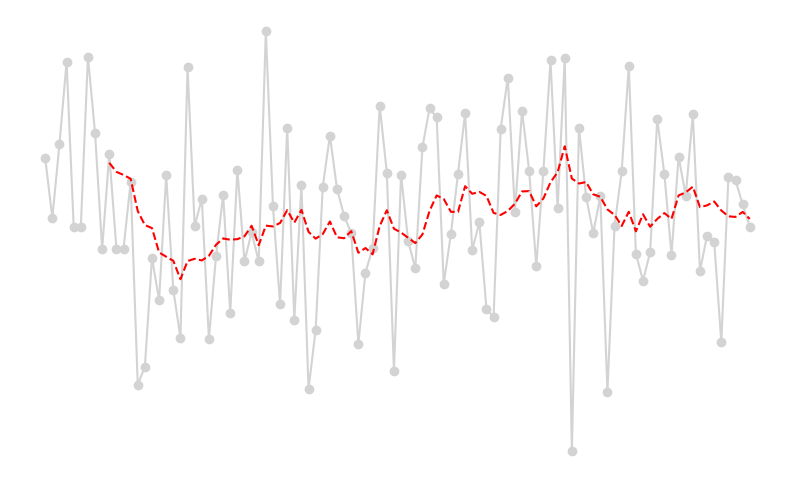

In [3]:


# Step 1: Generate Random Data
np.random.seed(42)  # For reproducibility
days = 100  # Number of days
data = np.round(np.random.normal(loc=100, scale=5, size=days), 2)


# Step 2: Create a Polars DataFrame
df = pl.DataFrame({
    't': pl.Series(range(1, days + 1)),
    'X': pl.Series(data)
})


window_size = 10
df = df.with_columns(
    pl.col('X').rolling_mean(window_size).alias(f'{window_size}-Day SMA')
)

plt.figure(figsize=(10, 6))

plt.plot(df['t'], df['X'], marker='o', color='lightgray', label='Closing Price')

plt.plot(df['t'], df[f'{window_size}-Day SMA'], marker='', linestyle='--', color='red', label='3-Day SMA')

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
sns.despine(left=True, bottom=True)

plt.grid(True)

plt.savefig('../content/vis/simple_moving_average.png', dpi=300)

plt.show()

# Exponential Moving Average

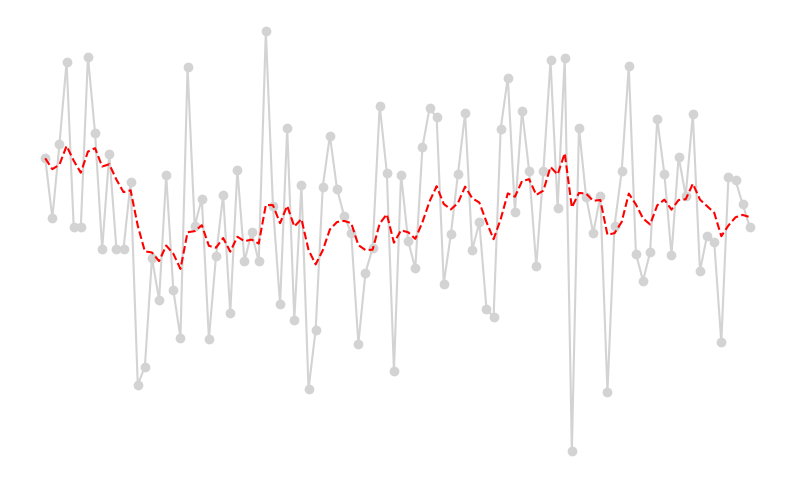

In [8]:

df = pl.DataFrame({
    "t": pl.Series(range(1, days + 1)),
    'X': pl.Series(data),
})

# Step 3: Calculate the 3-day Exponential Moving Average (EMA)
# Define the smoothing factor alpha
N = 10
alpha = 2 / (N + 1)

# Calculate EMA using a rolling_apply function
df = df.with_columns(
    pl.col("X").ewm_mean(span=N, adjust=False).alias(f'{N}-Day EMA')
)

plt.figure(figsize=(10, 6))

plt.plot(df['t'], df['X'], marker='o', color='lightgray', label='Closing Price')

plt.plot(df['t'], df[f'{N}-Day EMA'], marker='', linestyle='--', color='red', label=f'{N}-Day EMA')

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
sns.despine(left=True, bottom=True)

plt.grid(True)

plt.savefig('../content/vis/exponential_moving_average.png', dpi=300)

plt.show()

# Decomposition

/var/folders/gb/qpmlzbms1xg5h5tb31c2z73r0000gn/T/ipykernel_95873/2962916843.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', periods=T, freq='M')


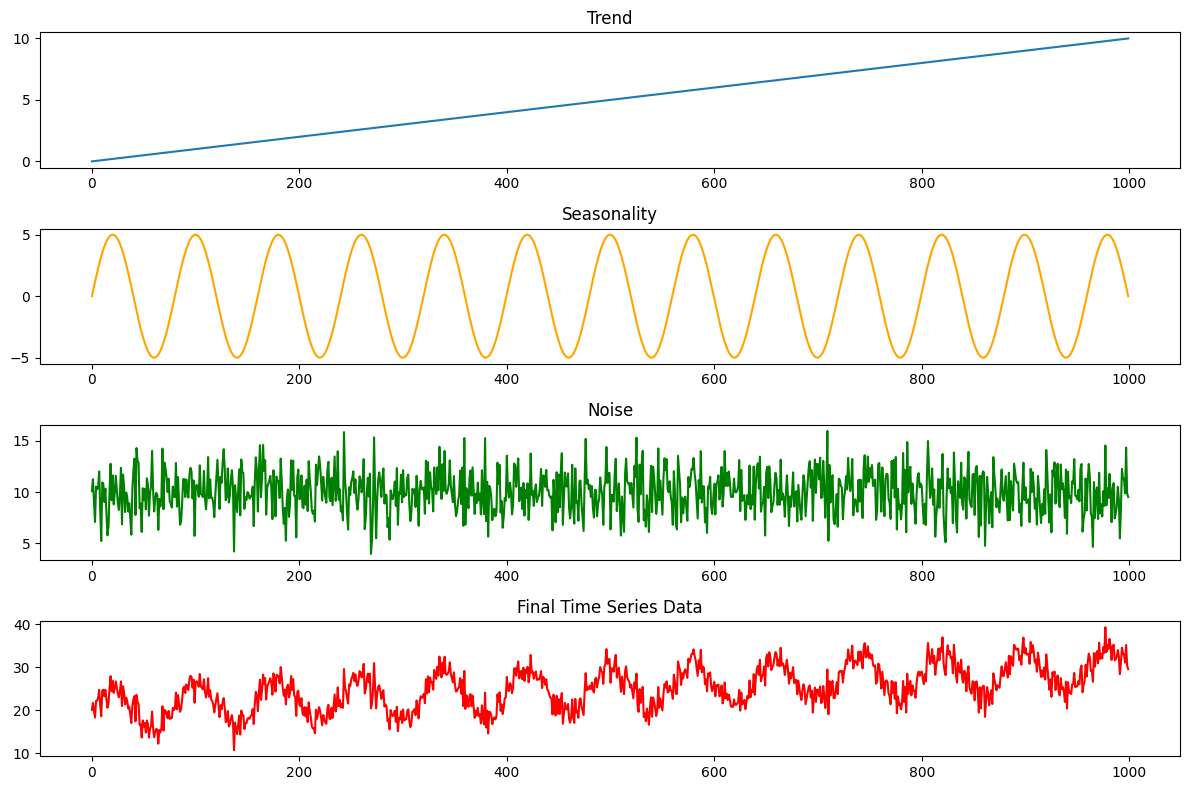

In [75]:
T = 1000

date_range = pd.date_range(start='2020-01-01', periods=T, freq='M')
level = 10
trend = np.linspace(0, 10, T)
seasonality = 5 * np.sin(np.linspace(0, 25 * np.pi, T))
noise = np.random.normal(loc=10, scale=2, size=T)

data = level + trend + seasonality + noise

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(trend, label='Trend')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(seasonality, label='Seasonality', color='orange')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(noise, label='Noise', color='green')
plt.title('Noise')

plt.subplot(4, 1, 4)
plt.plot(data, label='Time Series Data', color='red')
plt.title('Final Time Series Data')

plt.tight_layout()
plt.show()


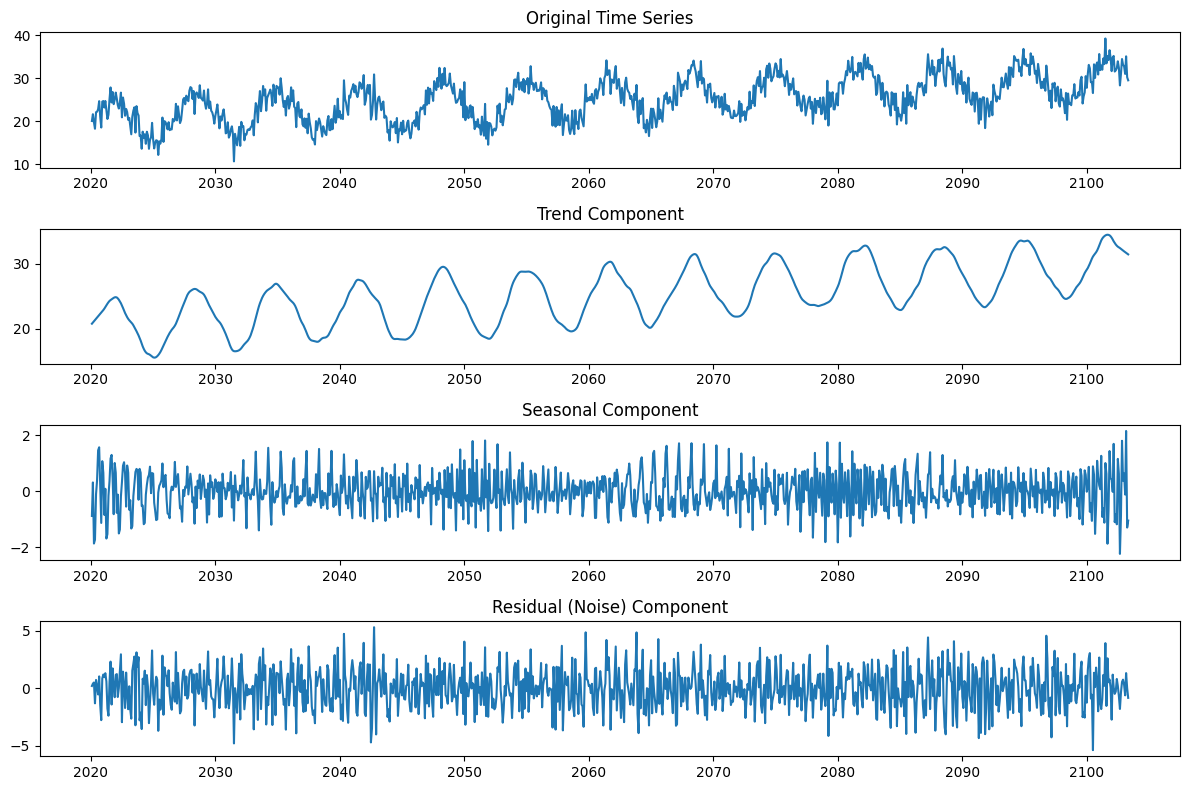

In [76]:
from statsmodels.tsa.seasonal import STL


df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

stl = STL(df['Value'], seasonal=13)
result = stl.fit()

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.title('Residual (Noise) Component')

plt.tight_layout()
plt.show()